# Support Vector Regression (SVR) Application

#### This Python code analyses different regression techniques using salary data. First, the data is read with pandas and the independent (X) and dependent (Y) variables are determined. A LinearRegression model is created, trained with X and Y and visualised. Then, polynomial regression models are created by performing second and fourth order polynomial transformations with PolynomialFeatures and the results are visualised. For both models, certain salary values (6.6 and 11) are estimated and printed on the screen. The data are scaled with StandardScaler and SVR (Support Vector Regression) model is created and trained and the predictions are visualised. Specific salary values are also predicted with the SVR model and printed on the screen.

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

data = pd.DataFrame(pd.read_csv("C:\\Users\\Arif Furkan\\OneDrive\\Belgeler\\Python_kullanirken\\maaslar.csv"))
print(data)

              unvan  Egitim Seviyesi   maas
0             Cayci                1   2250
1          Sekreter                2   2500
2  Uzman Yardimcisi                3   3000
3             Uzman                4   4000
4  Proje Yoneticisi                5   5500
5               Sef                6   7500
6             Mudur                7  10000
7          Direktor                8  15000
8           C-level                9  25000
9               CEO               10  50000


## Prepare the Features and Target

In [2]:
x = data.iloc[:,1:2]
y = data.iloc[:,2:]
X = x.values
Y = y.values

## Linear Regression

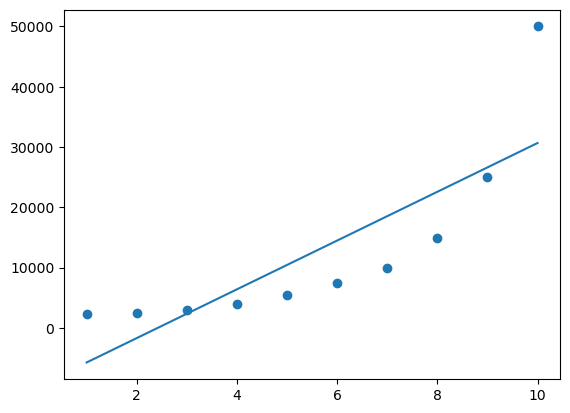

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

plt.scatter(X, Y)
plt.plot(x, lin_reg.predict(X))
plt.show()

## Polynomial Regression (Degree = 2)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


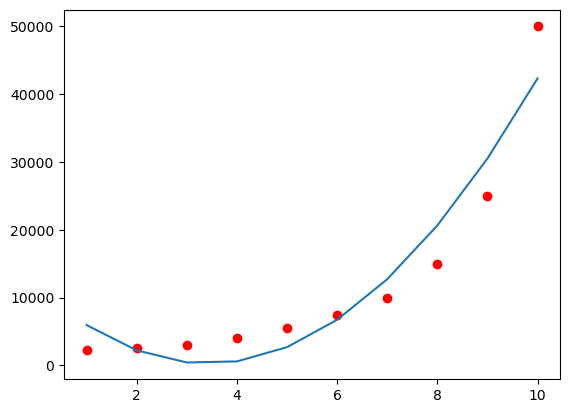

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree = 2)
x_poly2 = poly_reg2.fit_transform(X)
print(x_poly2)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly2, Y)

plt.scatter(X, Y, color="red")
plt.plot(X, lin_reg2.predict(poly_reg2.fit_transform(X)))
plt.show()

## Polynomial Regression (Degree = 4)

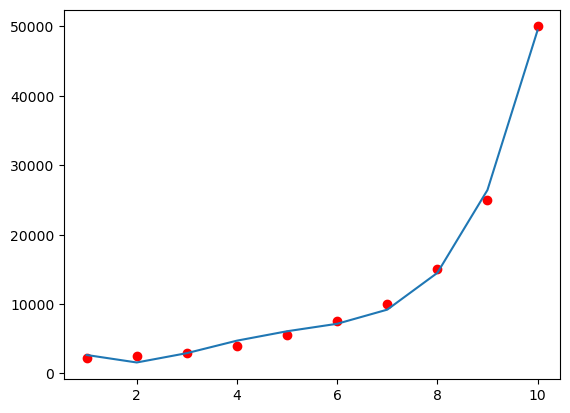

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg4 = PolynomialFeatures(degree = 4)
x_poly4 = poly_reg4.fit_transform(X)
lin_reg4 = LinearRegression()
lin_reg4.fit(x_poly4, Y)

plt.scatter(X, Y, color="red")
plt.plot(X, lin_reg4.predict(poly_reg4.fit_transform(X)))
plt.show()

## Predictions

In [6]:
print("Linear Regression Prediction (Position Level=11):", lin_reg.predict([[11]]))
print("Linear Regression Prediction (Position Level=6.6):", lin_reg.predict([[6.6]]))

print("Polynomial Regression Prediction (Degree=2, Position Level=6.6):", lin_reg2.predict(poly_reg2.transform([[6.6]])))
print("Polynomial Regression Prediction (Degree=2, Position Level=11):", lin_reg2.predict(poly_reg2.transform([[11]])))

Linear Regression Prediction (Position Level=11): [[34716.66666667]]
Linear Regression Prediction (Position Level=6.6): [[16923.33333333]]
Polynomial Regression Prediction (Degree=2, Position Level=6.6): [[10083.33333333]]
Polynomial Regression Prediction (Degree=2, Position Level=11): [[56091.66666667]]


## Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_scaled = sc1.fit_transform(X)
sc2 = StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(Y.reshape(-1, 1)))

## Support Vector Regression (SVR)

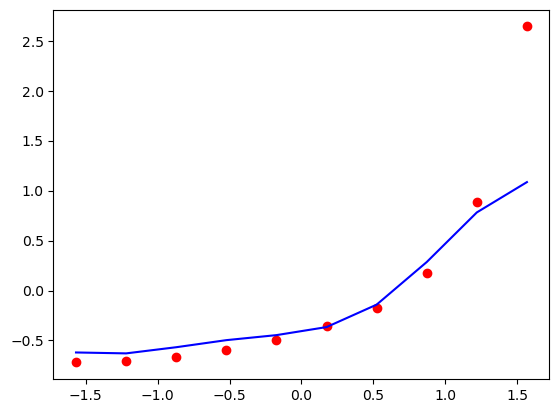

[0.01150915]
[0.01150915]


In [8]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_scaled, y_scaled)

plt.scatter(x_scaled, y_scaled, color='red')
plt.plot(x_scaled, svr_reg.predict(x_scaled), color='blue')
plt.show()

print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))